In [1]:
import numpy as np
import pandas as pd

In [2]:
date = pd.read_csv('orders_data.csv')

In [3]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [48]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


# Working with Dates

In [5]:
# First convert the type of data to datetime format
date['date'] = pd.to_datetime(date['date'])

In [14]:
date['date'].astype

<bound method NDFrame.astype of 0     2019-12-10
1     2018-08-15
2     2018-10-23
3     2019-08-17
4     2019-01-06
         ...    
995   2018-10-08
996   2018-12-06
997   2019-05-07
998   2019-03-03
999   2019-10-15
Name: date, Length: 1000, dtype: datetime64[ns]>

In [23]:
#Dropping Extra Columns
date.drop(columns=['product_id','city_id'],inplace=True)

## 1. Extract Year

In [24]:
date['Year'] = date['date'].dt.year

date.sample(5)

,date,orders,Year,Month,Month_Name,Day,Day_of_Week,Day_of_Week_Name
830,2019-03-14,4,2019,3,March,14,3,Thursday
318,2019-07-17,28,2019,7,July,17,2,Wednesday
948,2018-08-04,2,2018,8,August,4,5,Saturday
472,2019-11-05,3,2019,11,November,5,1,Tuesday
982,2019-06-22,2,2019,6,June,22,5,Saturday


## 2. Extract Month

In [25]:
date['Month'] = date['date'].dt.month

date.head()

,date,orders,Year,Month,Month_Name,Day,Day_of_Week,Day_of_Week_Name
0,2019-12-10,3,2019,12,December,10,1,Tuesday
1,2018-08-15,157,2018,8,August,15,2,Wednesday
2,2018-10-23,1,2018,10,October,23,1,Tuesday
3,2019-08-17,1,2019,8,August,17,5,Saturday
4,2019-01-06,3,2019,1,January,6,6,Sunday


In [26]:
date['Month_Name'] = date['date'].dt.month_name()

date.head()

,date,orders,Year,Month,Month_Name,Day,Day_of_Week,Day_of_Week_Name
0,2019-12-10,3,2019,12,December,10,1,Tuesday
1,2018-08-15,157,2018,8,August,15,2,Wednesday
2,2018-10-23,1,2018,10,October,23,1,Tuesday
3,2019-08-17,1,2019,8,August,17,5,Saturday
4,2019-01-06,3,2019,1,January,6,6,Sunday


## Extract Days

In [27]:
date['Day'] = date['date'].dt.day

date.head()

,date,orders,Year,Month,Month_Name,Day,Day_of_Week,Day_of_Week_Name
0,2019-12-10,3,2019,12,December,10,1,Tuesday
1,2018-08-15,157,2018,8,August,15,2,Wednesday
2,2018-10-23,1,2018,10,October,23,1,Tuesday
3,2019-08-17,1,2019,8,August,17,5,Saturday
4,2019-01-06,3,2019,1,January,6,6,Sunday


## Daily Orders

<Axes: xlabel='Day', ylabel='orders'>

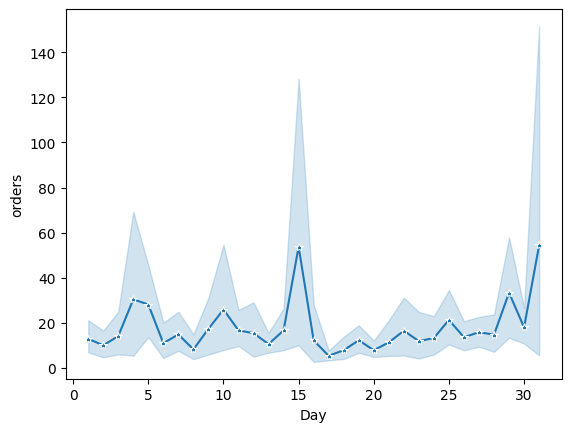

In [49]:
import seaborn as sns 

sns.lineplot(x="Day", y="orders", data=date, marker='*')


In [28]:
# Day of Week means which day of that week
date['Day_of_Week'] = date['date'].dt.dayofweek

date.head()


,date,orders,Year,Month,Month_Name,Day,Day_of_Week,Day_of_Week_Name
0,2019-12-10,3,2019,12,December,10,1,Tuesday
1,2018-08-15,157,2018,8,August,15,2,Wednesday
2,2018-10-23,1,2018,10,October,23,1,Tuesday
3,2019-08-17,1,2019,8,August,17,5,Saturday
4,2019-01-06,3,2019,1,January,6,6,Sunday


In [30]:
# day of week - name

date['Day_of_Week_Name'] = date['date'].dt.day_name()


In [31]:
# If 1 then weekend else 0 for non-holiday

date['Weekend?'] = np.where(date['Day_of_Week_Name'].isin(['Friday', 'Saturday']), 1,0)
date.head()

,date,orders,Year,Month,Month_Name,Day,Day_of_Week,Day_of_Week_Name,Weekend?
0,2019-12-10,3,2019,12,December,10,1,Tuesday,0
1,2018-08-15,157,2018,8,August,15,2,Wednesday,0
2,2018-10-23,1,2018,10,October,23,1,Tuesday,0
3,2019-08-17,1,2019,8,August,17,5,Saturday,1
4,2019-01-06,3,2019,1,January,6,6,Sunday,0


## Extract week of the year

In [36]:
date['Week_of_Year'] = date['date'].dt.isocalendar().week

date.head()

,date,orders,Year,Month,Month_Name,Day,Day_of_Week,Day_of_Week_Name,Weekend?,Week_of_Year
0,2019-12-10,3,2019,12,December,10,1,Tuesday,0,50
1,2018-08-15,157,2018,8,August,15,2,Wednesday,0,33
2,2018-10-23,1,2018,10,October,23,1,Tuesday,0,43
3,2019-08-17,1,2019,8,August,17,5,Saturday,1,33
4,2019-01-06,3,2019,1,January,6,6,Sunday,0,1


## Extract Quarter

In [37]:
date['Quarter'] = date['date'].dt.quarter

date.head()

,date,orders,Year,Month,Month_Name,Day,Day_of_Week,Day_of_Week_Name,Weekend?,Week_of_Year,Quarter
0,2019-12-10,3,2019,12,December,10,1,Tuesday,0,50,4
1,2018-08-15,157,2018,8,August,15,2,Wednesday,0,33,3
2,2018-10-23,1,2018,10,October,23,1,Tuesday,0,43,4
3,2019-08-17,1,2019,8,August,17,5,Saturday,1,33,3
4,2019-01-06,3,2019,1,January,6,6,Sunday,0,1,1


#### Extract Time elapsed between dates

In [26]:
import datetime

today = datetime.datetime.today()

today

datetime.datetime(2021, 4, 21, 16, 2, 16, 791379)

In [38]:
time=pd.read_csv('messages_data.csv')
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [39]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])

In [40]:
time['date'].astype

<bound method NDFrame.astype of 0     2013-12-15 00:50:00
1     2014-04-29 23:40:00
2     2012-12-30 00:21:00
3     2014-11-28 00:31:00
4     2013-10-26 23:11:00
              ...        
995   2012-03-16 00:50:00
996   2014-01-23 23:14:00
997   2012-10-15 23:37:00
998   2012-06-21 23:34:00
999   2014-06-19 23:25:00
Name: date, Length: 1000, dtype: datetime64[ns]>

## Extracting Hour,Minute and Second

In [41]:
time['Hour'] = time['date'].dt.hour
time['Min'] = time['date'].dt.minute
time['Sec'] = time['date'].dt.second

time.head()

,date,msg,Hour,Min,Sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


## Extracting Time Part

In [71]:
time['Time'] = time['date'].dt.time

time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00
